<a href="https://colab.research.google.com/github/AqilulMuttaqin/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/MyDrive/PCVK/female1.jpg')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


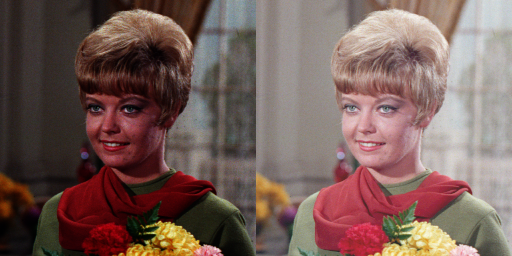

In [25]:
print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

def gamma_correction(image, gamma):
    if gamma <= 0:
        raise ValueError("Nilai gamma harus lebih besar dari 0.")

    normalized_image = image / 255.0
    corrected_image = np.power(normalized_image, 1.0 / gamma)
    return (corrected_image * 255).astype(np.uint8)

corrected_image = gamma_correction(image, gamma)

final_frame = cv.hconcat((image, corrected_image))
cv2_imshow(final_frame)

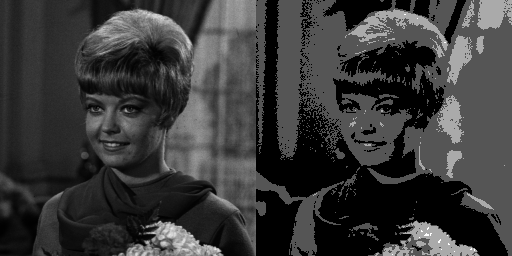

In [26]:
def quantize_image(image, bit_depth):
    levels = 2 ** bit_depth
    level_value = 255 / (levels - 1)
    quantized_image = np.round(image / level_value) * level_value
    return quantized_image.astype(np.uint8)

bit_depth = 2
image1 = cv.imread('/content/drive/MyDrive/PCVK/female1.jpg', cv.IMREAD_GRAYSCALE)

depth_image = quantize_image(image1, bit_depth)

final_frame = np.hstack((image1, depth_image))
cv2_imshow(final_frame)

In [30]:
# import glob
# from math import log10, sqrt

# original = cv.imread('/content/drive/MyDrive/PCVK/Image1/galaxy.jpg')
# cv_img = []
# for img in glob.glob('/content/drive/MyDrive/PCVK/Image1/*.jpg'):
#     n = cv.imread(img)
#     cv_img.append(n)

# dst = cv_img[0]
# noise_number = 4
# for i in range(noise_number):
#     if i == 0:
#         pass
#     else:
#         alpha = 1.0 / (i + 1)
#         beta = 1.0 - alpha
#         dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# def PSNR(original, compressed):
#     mse = np.mean((original - compressed) ** 2)
#     if(mse == 0):
#       return 100
#     max_pixel = 255.0
#     psnr = 20 * log10(max_pixel / sqrt(mse))
#     return psnr

# compressed = dst
# psnr = PSNR(original, compressed)

# print('Nilai PSNR adalah',psnr,'(dB)')
# galaxy_frame = cv.hconcat((original, dst))
# cv2_imshow(galaxy_frame)

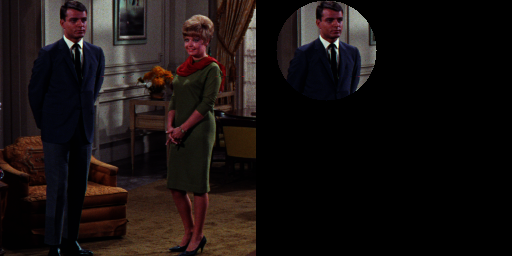

In [45]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
center_coordinates = (70, 50)
radius = 50
mask = cv.circle(mask, center_coordinates, radius, (255, 255, 255), thickness=cv.FILLED)

result = cv.bitwise_and(img_t, mask)

circle_frame = np.hstack((img_t, result))
cv2_imshow(circle_frame)